<a href="https://colab.research.google.com/github/HASAN-0121/men_women-_classification/blob/main/men_women_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Conv2D,Dense,Dropout,Flatten,MaxPool2D,AvgPool2D
from tensorflow.keras.activations import relu,sigmoid,tanh,softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,Adamax,Adagrad,Adadelta,SGD

In [4]:
path = '/content/drive/MyDrive/men and women classification'

In [5]:
train_data_path = '/content/drive/MyDrive/men and women classification/train'
test_data_path = '/content/drive/MyDrive/men and women classification/test'

In [6]:
img_width , img_height = 150,150

In [7]:
from glob import glob

In [11]:
glob('/content/drive/MyDrive/men and women classification/train/*')

['/content/drive/MyDrive/men and women classification/train/women',
 '/content/drive/MyDrive/men and women classification/train/men']

In [12]:
glob('/content/drive/MyDrive/men and women classification/test/*')

['/content/drive/MyDrive/men and women classification/test/men',
 '/content/drive/MyDrive/men and women classification/test/women']

In [13]:
labels = ['men','women']

In [14]:
train_gen = ImageDataGenerator(rescale=1/255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
test_gen = ImageDataGenerator(rescale=1/255)

In [26]:
train= train_gen.flow_from_directory(train_data_path,target_size=(img_width,img_height),classes=labels,class_mode='binary',batch_size=32)
test = test_gen.flow_from_directory(test_data_path,target_size=(img_width,img_height),classes=labels,class_mode='binary',batch_size=32)

Found 2482 images belonging to 2 classes.
Found 827 images belonging to 2 classes.


In [18]:
input_shape = (3,img_height,img_width,)

In [22]:
model1 = Sequential()
model1.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same',input_shape=(img_height,img_width,3)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(AvgPool2D(pool_size=(2,2)))
model1.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(AvgPool2D(pool_size=(2,2)))
model1.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(AvgPool2D(pool_size=(2,2)))
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dense(32,activation='relu'))
model1.add(Flatten())
model1.add(Dense(32,activation='relu'))
model1.add(Dense(16,activation='relu'))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))


In [23]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 512)     14336     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 512)      0         
 g2D)                                                            
                                                                 
 average_pooling2d_15 (Avera  (None, 37, 37, 512)      0         
 gePooling2D)                                                    
                                                                 
 conv2d_19 (Conv2D)          (None, 37, 37, 256)       1179904   
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 18, 18, 256)      0         
 g2D)                                                            
                                                      

In [24]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
epochs=50

In [27]:
model1.fit(train,epochs=epochs,validation_data=test)

Epoch 1/50
78/78 [==============================] - 598s 8s/step - loss: 0.6826 - accuracy: 0.5733 - val_loss: 0.6707 - val_accuracy: 0.5707
Epoch 2/50
78/78 [==============================] - 70s 893ms/step - loss: 0.6691 - accuracy: 0.5697 - val_loss: 0.6796 - val_accuracy: 0.5707
Epoch 3/50
78/78 [==============================] - 69s 881ms/step - loss: 0.6739 - accuracy: 0.5786 - val_loss: 0.6730 - val_accuracy: 0.5719
Epoch 4/50
78/78 [==============================] - 70s 895ms/step - loss: 0.6602 - accuracy: 0.6160 - val_loss: 0.6402 - val_accuracy: 0.6215
Epoch 5/50
78/78 [==============================] - 68s 875ms/step - loss: 0.6582 - accuracy: 0.6213 - val_loss: 0.6337 - val_accuracy: 0.6312
Epoch 6/50
78/78 [==============================] - 70s 902ms/step - loss: 0.6283 - accuracy: 0.6459 - val_loss: 0.6530 - val_accuracy: 0.5780
Epoch 7/50
78/78 [==============================] - 68s 873ms/step - loss: 0.6246 - accuracy: 0.6595 - val_loss: 0.6385 - val_accuracy: 0.6518
E

## VGG 16

In [28]:
from tensorflow.keras.applications.vgg16 import VGG16

In [29]:
vgg16 = VGG16(input_shape=[img_height,img_width] + [3] , weights='imagenet' , include_top = False)

58900480/58889256 [==============================] - 0s 0us/step


In [30]:
for layers in vgg16.layers:
    layers.trainable=False

In [31]:
x = Flatten()(vgg16.output)

In [32]:
predict = Dense(1 , activation = 'sigmoid')(x)

In [33]:
from tensorflow.keras.models import Model

In [34]:
model_vgg16 = Model(inputs = vgg16.inputs ,outputs = predict)

In [35]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [36]:
test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)

In [39]:
model_vgg16.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [42]:
model_vgg16.fit(train, validation_data=test, epochs=30, callbacks=[stop])

Epoch 1/30
78/78 [==============================] - 67s 861ms/step - loss: 0.1979 - accuracy: 0.9299 - val_loss: 0.4605 - val_accuracy: 0.7908
Epoch 2/30
78/78 [==============================] - 67s 854ms/step - loss: 0.2016 - accuracy: 0.9247 - val_loss: 0.4538 - val_accuracy: 0.7811
Epoch 3/30
78/78 [==============================] - 67s 855ms/step - loss: 0.1928 - accuracy: 0.9239 - val_loss: 0.4575 - val_accuracy: 0.7823
Epoch 4/30
78/78 [==============================] - 66s 855ms/step - loss: 0.1902 - accuracy: 0.9307 - val_loss: 0.4820 - val_accuracy: 0.7787
Epoch 5/30
78/78 [==============================] - 67s 858ms/step - loss: 0.1785 - accuracy: 0.9396 - val_loss: 0.5086 - val_accuracy: 0.7787
Epoch 6/30
78/78 [==============================] - 67s 858ms/step - loss: 0.1887 - accuracy: 0.9295 - val_loss: 0.4734 - val_accuracy: 0.7872
Epoch 7/30
78/78 [==============================] - 67s 857ms/step - loss: 0.1919 - accuracy: 0.9247 - val_loss: 0.5324 - val_accuracy: 0.7642

In [45]:
model_vgg16.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
train_loss = model_vgg16.history.history['loss']
train_loss

[0.19788378477096558,
 0.20155590772628784,
 0.19279637932777405,
 0.1902494877576828,
 0.17852690815925598,
 0.1886943280696869,
 0.19188043475151062,
 0.18573521077632904]

In [50]:
train_acc = model_vgg16.history.history['accuracy']
train_acc

[0.9298952221870422,
 0.9246575236320496,
 0.923851728439331,
 0.9307010769844055,
 0.9395648837089539,
 0.9294923543930054,
 0.9246575236320496,
 0.9294923543930054]

In [51]:
test_loss = model_vgg16.history.history['val_loss']
test_loss

[0.4605042636394501,
 0.4537735879421234,
 0.45746684074401855,
 0.48201027512550354,
 0.5085664391517639,
 0.4734223186969757,
 0.5324051380157471,
 0.4783255159854889]

In [52]:
test_acc = model_vgg16.history.history['val_accuracy']
test_acc

[0.7908101677894592,
 0.7811366319656372,
 0.7823458313941956,
 0.7787182331085205,
 0.7787182331085205,
 0.7871825695037842,
 0.7642079591751099,
 0.7823458313941956]

In [63]:
from tensorflow.keras.preprocessing import image
def classification (path):
  a = plt.imread(path)
  plt.imshow(a)

  img_pred = image.load_img(path,target_size=(img_height,img_width))
  img_pred = image.img_to_array(img_pred)
  a = np.expand_dims(img_pred,axis=0)
  result = model_vgg16.predict(a)
  print('prediction class',result)
  if result[0]==0:
      print('Predicted_result = men')
  else:
      print('Predicted_result = women')


prediction class [[0.]]
Predicted_result = men


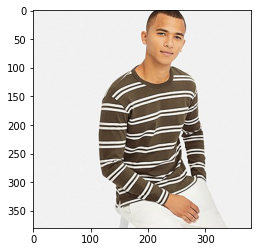

In [64]:
classification('/content/drive/MyDrive/men and women classification/train/men/00000358.jpg')

prediction class [[1.]]
Predicted_result = women


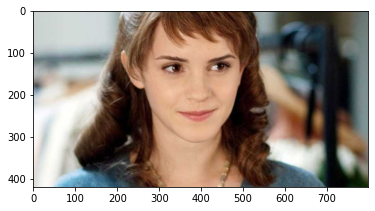

In [65]:
classification("/content/drive/MyDrive/men and women classification/train/women/00000457.jpg")